# Model Prediksi Hasil Pertandingan Sepak Bola menggunakan Statistic Pertandingan Sejarah


## **Deskripsi Project**

**Kejelasan Masalah:**

Prediksi hasil pertandingan sepak bola merupakan masalah yang menarik untuk dipecahkan menggunakan pendekatan kecerdasan buatan. Fokus utama adalah menganalisis data pertandingan sejarah untuk mengidentifikasi pola-pola yang ada dan mengelompokkan pertandingan berdasarkan karakteristik yang serupa. Clustering digunakan untuk memahami hubungan antara tim dan hasil pertandingan dengan memanfaatkan statistik historis tanpa label.

**Kebaruan Data:**

Dataset yang digunakan berasal dari sejarah pertandingan sepak bola, yang mencakup berbagai statistik seperti skor, jumlah serangan, penguasaan bola, dan faktor lainnya. Data ini relevan untuk mengidentifikasi pola permainan dan faktor yang memengaruhi hasil pertandingan.

**Kesesuaian Data dengan Masalah:**

Data statistik pertandingan mencakup fitur-fitur seperti skor, jumlah serangan, penguasaan bola, dan peluang lainnya. Data ini sangat sesuai untuk diterapkan dengan teknik clustering untuk menemukan pola dalam data tanpa membutuhkan label eksplisit.

**Kesesuaian Metode dengan Masalah:**

Dalam pendekatan ini, metode unsupervised learning digunakan untuk mengelompokkan pertandingan menggunakan algoritma K-Means dan Gaussian Mixture Models (GMM). K-Means membantu mengelompokkan pertandingan berdasarkan kesamaan karakteristik, sementara GMM digunakan untuk mengidentifikasi distribusi probabilistik yang lebih fleksibel. Hasil clustering ini digunakan untuk memahami pola dalam pertandingan sepak bola dan memprediksi hasil pertandingan mendatang berdasarkan pola yang ditemukan.

**Kesesuaian Metric Evaluasi:**

Untuk evaluasi clustering, Silhouette Score digunakan untuk mengukur seberapa baik setiap titik data cocok dengan klusternya, sedangkan Calinski-Harabasz Score digunakan untuk menilai kualitas pemisahan antar kluster.
Metode yang digunakan melibatkan:

K-Means Clustering: Untuk mengelompokkan pertandingan berdasarkan kesamaan statistik.
Gaussian Mixture Models (GMM): Untuk mengidentifikasi distribusi probabilitas dan pola dalam data.
Metric Evaluasi: Mengukur kualitas clustering menggunakan Silhouette Score dan Calinski-Harabasz Score.


## Credit:

Computer Science UPI

Machine learning and Artificial Intelligent

Kelompok 11
- Abdurrahman Al Ghifari (2300456)
- Ahmad Izzuddin Azzam (2300492)
- Julian Dwi Satrio (2300484)
- Ibnu Fadhilah (2300613)

## Import dataset and Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import warnings
warnings.filterwarnings('ignore')

# Membaca dataset dari tautan
url = "https://drive.google.com/uc?export=download&id=1iLXK8uWy4a4xffRVHIUBrMETDC19ry_v"
data = pd.read_csv(url)

# Pilih fitur yang akan digunakan untuk analisis dan prediksi
selected_features = [
    'Country', 'League', 'home_team', 'away_team',
    'home_score', 'away_score',
    'expected_goals_xg_home', 'expected_goals_xg_host',
    'Goal_Attempts_Home', 'Goal_Attempts_Host',
    'Shots_on_Goal_Home', 'Shots_on_Goal_Host',
    'Shots_off_Goal_Home', 'Shots_off_Goal_Host',
    'Fouls_Home', 'Fouls_Host',
    'Yellow_Cards_Home', 'Yellow_Cards_Host',
    'Red_Cards_Home', 'Red_Cards_Host',
    'Dangerous_Attacks_Home', 'Dangerous_Attacks_Host',
    'Pass_Success_per_Home', 'Pass_Success_per_Host',
    'Corner_Kicks_Home', 'Corner_Kicks_Host'
]

data.head()

,Country,League,home_team,away_team,home_score,away_score,season_year,Date_day,Date_hour,first_half,...,Distance_Covered_(km)_Home,Distance_Covered_(km)_Host,Clearances_Completed_Home,Clearances_Completed_Host,Pass_Success_per_Home,Pass_Success_per_Host,referee,venue,capacity,attendance
0,Germany,Bundesliga,B. Monchengladbach,Werder Bremen,4,1,2024/2025,3.11,19:30,3 - 0,...,NaN,NaN,NaN,NaN,NaN,NaN,Dankert B. (Ger),Borussia-Park (Mönchengladbach),54 042,54 042
1,Germany,Bundesliga,Freiburg,Mainz,0,0,2024/2025,3.11,17:30,0 - 0,...,NaN,NaN,NaN,NaN,NaN,NaN,Brand B. (Ger),Europa-Park Stadion (Freiburg),34 700,34 400
2,Germany,Bundesliga,Dortmund,RB Leipzig,2,1,2024/2025,2.11,20:30,1 - 1,...,NaN,NaN,NaN,NaN,NaN,NaN,Stieler T. (Ger),Signal Iduna Park (Dortmund),81 365,81 365
3,Germany,Bundesliga,Bayern Munich,Union Berlin,3,0,2024/2025,2.11,17:30,2 - 0,...,NaN,NaN,NaN,NaN,NaN,NaN,Jollenbeck M. (Ger),Allianz Arena (Munich),75 024,75 000
4,Germany,Bundesliga,Eintracht Frankfurt,Bochum,7,2,2024/2025,2.11,17:30,4 - 1,...,NaN,NaN,NaN,NaN,NaN,NaN,Schlager D. (Ger),Deutsche Bank Park (Frankfurt),58 000,58 000


## Data Cleaning

In [ ]:
# Pembersihan data
def clean_data(df, selected_features):
    # Filter dataset untuk fitur yang dipilih
    df = df[selected_features]

    # Pisahkan kolom numerik dan kolom string
    numeric_columns = [col for col in df.columns if df[col].dtype != 'object' and col not in ['Country', 'League', 'home_team', 'away_team']]
    string_columns = ['Country', 'League', 'home_team', 'away_team']

    # Pembersihan untuk kolom numerik
    df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
    for column in numeric_columns:
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)

    # Ubah kolom numerik menjadi bilangan bulat
    df[numeric_columns] = df[numeric_columns].astype(int)

    # Hapus baris duplikat
    df.drop_duplicates(inplace=True)

    # Pastikan jumlah data menyesuaikan dengan data numerik
    df = df.dropna(subset=numeric_columns)

    return df

# Bersihkan data
cleaned_data = clean_data(data, selected_features)

# Tampilkan informasi data
print(cleaned_data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 90175 entries, 0 to 95383
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Country                 90175 non-null  object
 1   League                  90175 non-null  object
 2   home_team               90175 non-null  object
 3   away_team               90175 non-null  object
 4   home_score              90175 non-null  object
 5   away_score              90175 non-null  object
 6   expected_goals_xg_home  90175 non-null  int64 
 7   expected_goals_xg_host  90175 non-null  int64 
 8   Goal_Attempts_Home      90175 non-null  int64 
 9   Goal_Attempts_Host      90175 non-null  int64 
 10  Shots_on_Goal_Home      90175 non-null  int64 
 11  Shots_on_Goal_Host      90175 non-null  int64 
 12  Shots_off_Goal_Home     90175 non-null  int64 
 13  Shots_off_Goal_Host     90175 non-null  int64 
 14  Fouls_Home              90175 non-null  int64 
 15  Fouls_H

## User Input Home Team vs Away Team

In [ ]:
# Input tim
print("Daftar tim yang tersedia:")
print("\nTim Home:")
print(cleaned_data['home_team'].unique())
print("\nTim Away:")
print(cleaned_data['away_team'].unique())

home_team = input("\nMasukkan nama tim home: ")
away_team = input("Masukkan nama tim away: ")

# Cek keberadaan tim di dataset
if home_team not in cleaned_data['home_team'].values:
    print(f"Tim {home_team} tidak ditemukan dalam data.")
    exit()
elif away_team not in cleaned_data['away_team'].values:
    print(f"Tim {away_team} tidak ditemukan dalam data.")
    exit()
else:
    print(f"Tim {home_team} dan {away_team} ditemukan.")

# Filter data untuk kedua tim
home_team_data = cleaned_data[cleaned_data['home_team'] == home_team]
away_team_data = cleaned_data[cleaned_data['away_team'] == away_team]

Daftar tim yang tersedia:

Tim Home:
['B. Monchengladbach' 'Freiburg' 'Dortmund' ... 'Valladolid Promesas'
 'Tudelano' 'Racing Club Ferrol\r\n2']

Tim Away:
['Werder Bremen' 'Mainz' 'RB Leipzig' ... 'Valladolid Promesas' 'Zamora'
 'Calahorra']

Masukkan nama tim home: Real Madrid
Masukkan nama tim away: Barcelona
Tim Real Madrid dan Barcelona ditemukan.


## EDA Team Statistics

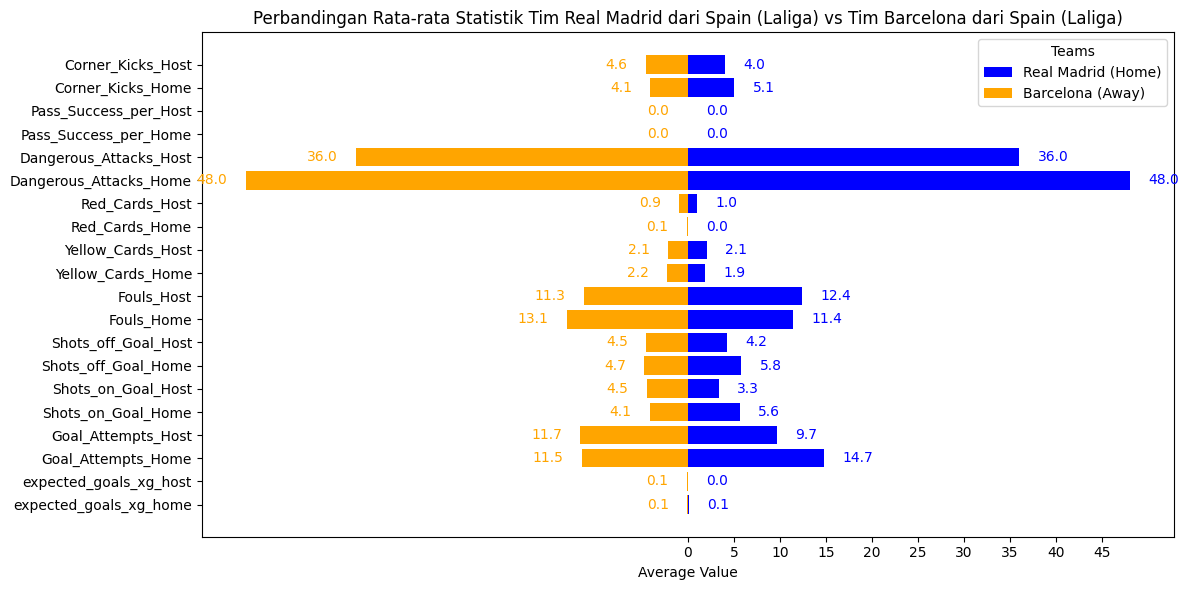

In [ ]:
# Pilih fitur numerik untuk clustering
numeric_features = [
    'expected_goals_xg_home', 'expected_goals_xg_host',
    'Goal_Attempts_Home', 'Goal_Attempts_Host',
    'Shots_on_Goal_Home', 'Shots_on_Goal_Host',
    'Shots_off_Goal_Home', 'Shots_off_Goal_Host',
    'Fouls_Home', 'Fouls_Host',
    'Yellow_Cards_Home', 'Yellow_Cards_Host',
    'Red_Cards_Home', 'Red_Cards_Host',
    'Dangerous_Attacks_Home', 'Dangerous_Attacks_Host',
    'Pass_Success_per_Home', 'Pass_Success_per_Host',
    'Corner_Kicks_Home', 'Corner_Kicks_Host'
]

def prepare_data_for_clustering(home_team_data, away_team_data, numeric_features):
    # Gabungkan data
    combined_data = pd.concat([home_team_data, away_team_data])

    # Deteksi dan tangani outlier menggunakan IQR
    def remove_outliers(df, features):
        df_clean = df.copy()
        for feature in features:
            Q1 = df[feature].quantile(0.25)
            Q3 = df[feature].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_clean[feature] = df_clean[feature].clip(lower_bound, upper_bound)
        return df_clean

    combined_data = remove_outliers(combined_data, numeric_features)

    # Normalisasi dengan RobustScaler
    scaler = RobustScaler()
    X_scaled = scaler.fit_transform(combined_data[numeric_features])

    return X_scaled, combined_data, scaler

# Persiapkan data
X_scaled, combined_data, scaler = prepare_data_for_clustering(home_team_data, away_team_data, numeric_features)
# Visualisasi perbandingan statistik (seperti sebelumnya)
home_team_numeric = home_team_data[numeric_features].apply(pd.to_numeric, errors='coerce')
away_team_numeric = away_team_data[numeric_features].apply(pd.to_numeric, errors='coerce')

# Hitung rata-rata untuk kedua tim
home_avg = home_team_numeric.mean()
away_avg = away_team_numeric.mean()

# Ambil informasi tambahan untuk label plot
home_country = home_team_data['Country'].iloc[0]
home_league = home_team_data['League'].iloc[0]
away_country = away_team_data['Country'].iloc[0]
away_league = away_team_data['League'].iloc[0]

# Buat DataFrame untuk visualisasi
comparison_df = pd.DataFrame({
    'Feature': numeric_features,
    f'{home_team} (Home)': home_avg.values,
    f'{away_team} (Away)': away_avg.values
})

# Plot perbandingan rata-rata
plt.figure(figsize=(12, 6))
index = range(len(comparison_df['Feature']))

# Plot batang horizontal
home_bar = plt.barh(index, comparison_df[f'{home_team} (Home)'], label=f'{home_team} (Home)', color='blue', align='center')
away_bar = plt.barh(index, -comparison_df[f'{away_team} (Away)'], label=f'{away_team} (Away)', color='orange', align='center')

# Menentukan rentang sumbu x
x_min = min(comparison_df[f'{home_team} (Home)'].min(), comparison_df[f'{away_team} (Away)'].min())
x_max = max(comparison_df[f'{home_team} (Home)'].max(), comparison_df[f'{away_team} (Away)'].max())
x_ticks_range = range(int(x_min // 5) * 5, int(x_max // 5 + 1) * 5, 5)
plt.xticks(x_ticks_range)

# Label nilai rata-rata
for i in index:
    plt.text(comparison_df[f'{home_team} (Home)'][i] + 2, i, f'{comparison_df[f"{home_team} (Home)"][i]:.1f}',
             va='center', ha='left', color='blue')
    plt.text(-comparison_df[f'{away_team} (Away)'][i] - 2, i, f'{comparison_df[f"{away_team} (Away)"][i]:.1f}',
             va='center', ha='right', color='orange')

plt.yticks(index, comparison_df['Feature'])
plt.xlabel('Average Value')
plt.title(f"Perbandingan Rata-rata Statistik Tim {home_team} dari {home_country} ({home_league}) vs Tim {away_team} dari {away_country} ({away_league})")
plt.legend(title='Teams')
plt.tight_layout()
plt.show()

## Machine Learning Model

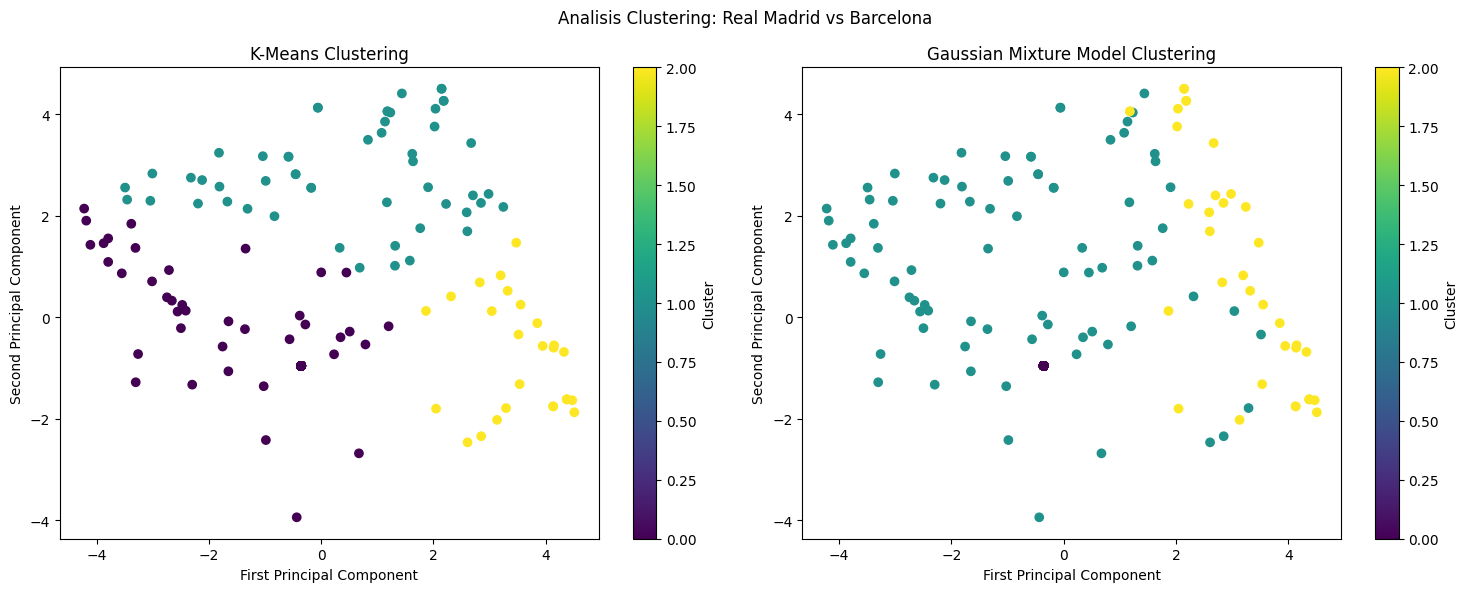


Analisis Cluster K-Means:

Karakteristik Cluster 0:
Rata-rata statistik:
expected_goals_xg_home     0.000000
expected_goals_xg_host     0.000000
Goal_Attempts_Home        11.787356
Goal_Attempts_Host         9.494253
Shots_on_Goal_Home         3.928161
Shots_on_Goal_Host         3.267241
Shots_off_Goal_Home        5.000000
Shots_off_Goal_Host        4.022989
Fouls_Home                12.000000
Fouls_Host                12.000000
Yellow_Cards_Home          2.000000
Yellow_Cards_Host          2.000000
Red_Cards_Home             0.000000
Red_Cards_Host             1.000000
Dangerous_Attacks_Home    48.000000
Dangerous_Attacks_Host    36.000000
Pass_Success_per_Home      0.000000
Pass_Success_per_Host      0.000000
Corner_Kicks_Home          3.945402
Corner_Kicks_Host          4.000000
dtype: float64
Jumlah pertandingan dalam cluster: 174

Karakteristik Cluster 1:
Rata-rata statistik:
expected_goals_xg_home     0.000000
expected_goals_xg_host     0.000000
Goal_Attempts_Home        13.4433

In [ ]:
# Proses Clustering
# Persiapkan data
X_scaled, combined_data, scaler = prepare_data_for_clustering(home_team_data, away_team_data, numeric_features)

# K-Means Clustering
n_clusters = 3  # Jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# GMM Clustering
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Visualisasi hasil clustering menggunakan PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot hasil clustering
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot K-Means
scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
ax1.set_title('K-Means Clustering')
ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
plt.colorbar(scatter1, ax=ax1, label='Cluster')

# Plot GMM
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='viridis')
ax2.set_title('Gaussian Mixture Model Clustering')
ax2.set_xlabel('First Principal Component')
ax2.set_ylabel('Second Principal Component')
plt.colorbar(scatter2, ax=ax2, label='Cluster')

plt.suptitle(f'Analisis Clustering: {home_team} vs {away_team}')
plt.tight_layout()
plt.show()

# Analisis karakteristik cluster
# Tambahkan label cluster ke data
combined_data['KMeans_Cluster'] = kmeans_labels
combined_data['GMM_Cluster'] = gmm_labels

# Analisis cluster K-Means
print("\nAnalisis Cluster K-Means:")
for cluster in range(n_clusters):
    cluster_data = combined_data[combined_data['KMeans_Cluster'] == cluster]
    print(f"\nKarakteristik Cluster {cluster}:")
    print("Rata-rata statistik:")
    print(cluster_data[numeric_features].mean())
    print(f"Jumlah pertandingan dalam cluster: {len(cluster_data)}")

# Analisis cluster GMM
print("\nAnalisis Cluster GMM:")
for cluster in range(n_clusters):
    cluster_data = combined_data[combined_data['GMM_Cluster'] == cluster]
    print(f"\nKarakteristik Cluster {cluster}:")
    print("Rata-rata statistik:")
    print(cluster_data[numeric_features].mean())
    print(f"Jumlah pertandingan dalam cluster: {len(cluster_data)}")

# Prediksi cluster untuk performansi rata-rata kedua tim
avg_performance = combined_data[numeric_features].mean().values.reshape(1, -1)
avg_performance_scaled = scaler.transform(avg_performance.reshape(1, -1))  # Gunakan scaler yang sudah ada

kmeans_cluster = kmeans.predict(avg_performance_scaled)[0]
gmm_cluster = gmm.predict(avg_performance_scaled)[0]

print(f"\nCluster untuk performansi rata-rata:")
print(f"K-Means Cluster: {kmeans_cluster}")
print(f"GMM Cluster: {gmm_cluster}")

## Metric Evaluation

In [ ]:
def evaluate_clustering_simple(X_scaled, kmeans_labels, gmm_labels):
    """
    Menghitung metrik evaluasi sederhana untuk clustering
    """
    # Hitung skor untuk K-Means
    kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
    kmeans_ch = calinski_harabasz_score(X_scaled, kmeans_labels)

    # Hitung skor untuk GMM
    gmm_silhouette = silhouette_score(X_scaled, gmm_labels)
    gmm_ch = calinski_harabasz_score(X_scaled, gmm_labels)

    # Tampilkan hasil evaluasi
    print("\n=== EVALUASI CLUSTERING ===")
    print("\nSkor K-Means:")
    print(f"Silhouette Score: {kmeans_silhouette:.3f}")
    print(f"Calinski-Harabasz Score: {kmeans_ch:.3f}")

    print("\nSkor GMM:")
    print(f"Silhouette Score: {gmm_silhouette:.3f}")
    print(f"Calinski-Harabasz Score: {gmm_ch:.3f}")

    # Tentukan metode terbaik
    best_method = "K-Means" if kmeans_silhouette > gmm_silhouette else "GMM"
    print(f"\nMetode clustering terbaik: {best_method}")

# Tambahkan setelah melakukan clustering
evaluate_clustering_simple(X_scaled, kmeans_labels, gmm_labels)


=== EVALUASI CLUSTERING ===

Skor K-Means:
Silhouette Score: 0.548
Calinski-Harabasz Score: 110.195

Skor GMM:
Silhouette Score: 0.510
Calinski-Harabasz Score: 65.299

Metode clustering terbaik: K-Means


## Output Percentage


=== PREDIKSI HASIL PERTANDINGAN ===

Berdasarkan analisis K-Means (Cluster 0):
Probabilitas Real Madrid menang: 38.51%
Probabilitas Barcelona menang: 35.81%
Probabilitas Seri: 25.68%

Berdasarkan analisis GMM (Cluster 0):
Probabilitas Real Madrid menang: 42.98%
Probabilitas Barcelona menang: 30.70%
Probabilitas Seri: 26.32%


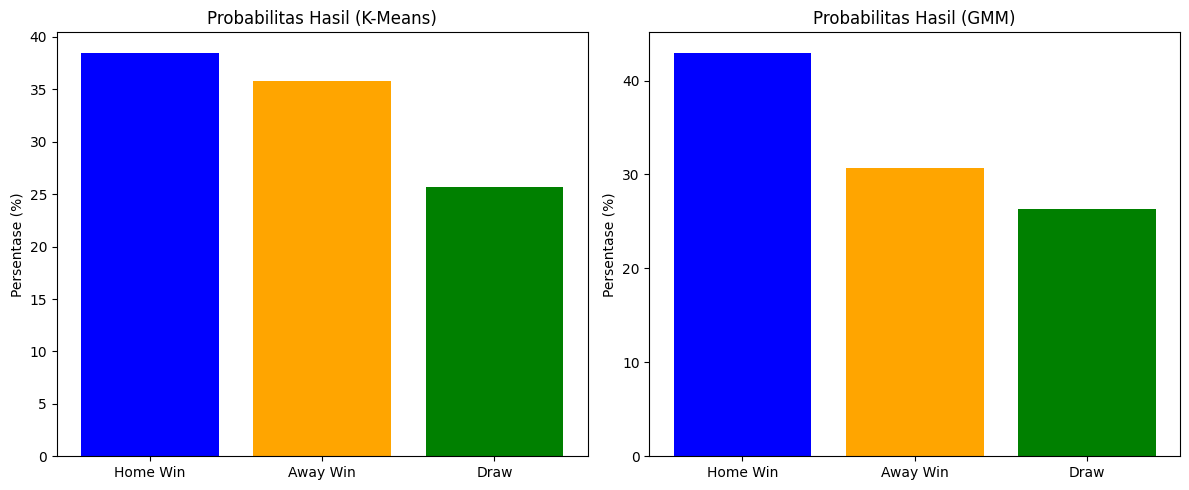


=== REKOMENDASI ===
Berdasarkan K-Means: Real Madrid memiliki peluang lebih besar untuk menang
Berdasarkan GMM: Real Madrid memiliki peluang lebih besar untuk menang


In [ ]:
def calculate_win_probability(combined_data, home_team, away_team, kmeans_labels, gmm_labels, n_clusters):
    # Tambahkan kolom winner berdasarkan skor
    combined_data['winner'] = combined_data.apply(
        lambda row: row['home_team'] if row['home_score'] > row['away_score']
        else row['away_team'] if row['away_score'] > row['home_score']
        else 'Draw',
        axis=1
    )

    # Hitung probabilitas untuk setiap cluster
    cluster_probs = {'kmeans': {}, 'gmm': {}}

    # Analisis untuk K-Means
    for cluster in range(n_clusters):
        cluster_data = combined_data[combined_data['KMeans_Cluster'] == cluster]
        total_matches = len(cluster_data)
        if total_matches > 0:
            home_wins = len(cluster_data[cluster_data['winner'] == home_team])
            away_wins = len(cluster_data[cluster_data['winner'] == away_team])
            draws = len(cluster_data[cluster_data['winner'] == 'Draw'])

            # Normalisasi probabilitas agar total = 100%
            total_outcomes = home_wins + away_wins + draws
            if total_outcomes > 0:
                cluster_probs['kmeans'][cluster] = {
                    'home_win': (home_wins / total_outcomes) * 100,
                    'away_win': (away_wins / total_outcomes) * 100,
                    'draw': (draws / total_outcomes) * 100
                }

    # Analisis untuk GMM
    for cluster in range(n_clusters):
        cluster_data = combined_data[combined_data['GMM_Cluster'] == cluster]
        total_matches = len(cluster_data)
        if total_matches > 0:
            home_wins = len(cluster_data[cluster_data['winner'] == home_team])
            away_wins = len(cluster_data[cluster_data['winner'] == away_team])
            draws = len(cluster_data[cluster_data['winner'] == 'Draw'])

            # Normalisasi probabilitas agar total = 100%
            total_outcomes = home_wins + away_wins + draws
            if total_outcomes > 0:
                cluster_probs['gmm'][cluster] = {
                    'home_win': (home_wins / total_outcomes) * 100,
                    'away_win': (away_wins / total_outcomes) * 100,
                    'draw': (draws / total_outcomes) * 100
                }

    return cluster_probs

# Hitung probabilitas
cluster_probabilities = calculate_win_probability(
    combined_data, home_team, away_team,
    kmeans_labels, gmm_labels, n_clusters
)

# Prediksi cluster untuk performansi rata-rata kedua tim
avg_performance = combined_data[numeric_features].mean().values.reshape(1, -1)
avg_performance_scaled = StandardScaler().fit_transform(combined_data[numeric_features]).mean(axis=0).reshape(1, -1)

kmeans_cluster = kmeans.predict(avg_performance_scaled)[0]
gmm_cluster = gmm.predict(avg_performance_scaled)[0]

# Tampilkan hasil prediksi
print("\n=== PREDIKSI HASIL PERTANDINGAN ===")
print(f"\nBerdasarkan analisis K-Means (Cluster {kmeans_cluster}):")
if kmeans_cluster in cluster_probabilities['kmeans']:
    probs = cluster_probabilities['kmeans'][kmeans_cluster]
    print(f"Probabilitas {home_team} menang: {probs['home_win']:.2f}%")
    print(f"Probabilitas {away_team} menang: {probs['away_win']:.2f}%")
    print(f"Probabilitas Seri: {probs['draw']:.2f}%")
else:
    print("Tidak cukup data untuk membuat prediksi dengan K-Means")

print(f"\nBerdasarkan analisis GMM (Cluster {gmm_cluster}):")
if gmm_cluster in cluster_probabilities['gmm']:
    probs = cluster_probabilities['gmm'][gmm_cluster]
    print(f"Probabilitas {home_team} menang: {probs['home_win']:.2f}%")
    print(f"Probabilitas {away_team} menang: {probs['away_win']:.2f}%")
    print(f"Probabilitas Seri: {probs['draw']:.2f}%")
else:
    print("Tidak cukup data untuk membuat prediksi dengan GMM")

# Visualisasi probabilitas
plt.figure(figsize=(12, 5))

# Plot untuk K-Means
plt.subplot(1, 2, 1)
if kmeans_cluster in cluster_probabilities['kmeans']:
    probs = cluster_probabilities['kmeans'][kmeans_cluster]
    plt.bar(['Home Win', 'Away Win', 'Draw'],
            [probs['home_win'], probs['away_win'], probs['draw']],
            color=['blue', 'orange', 'green'])
    plt.title('Probabilitas Hasil (K-Means)')
    plt.ylabel('Persentase (%)')

# Plot untuk GMM
plt.subplot(1, 2, 2)
if gmm_cluster in cluster_probabilities['gmm']:
    probs = cluster_probabilities['gmm'][gmm_cluster]
    plt.bar(['Home Win', 'Away Win', 'Draw'],
            [probs['home_win'], probs['away_win'], probs['draw']],
            color=['blue', 'orange', 'green'])
    plt.title('Probabilitas Hasil (GMM)')
    plt.ylabel('Persentase (%)')

plt.tight_layout()
plt.show()

# Tampilkan rekomendasi
print("\n=== REKOMENDASI ===")
# K-Means
if kmeans_cluster in cluster_probabilities['kmeans']:
    probs = cluster_probabilities['kmeans'][kmeans_cluster]
    max_prob = max(probs['home_win'], probs['away_win'], probs['draw'])
    if max_prob == probs['home_win']:
        print(f"Berdasarkan K-Means: {home_team} memiliki peluang lebih besar untuk menang")
    elif max_prob == probs['away_win']:
        print(f"Berdasarkan K-Means: {away_team} memiliki peluang lebih besar untuk menang")
    else:
        print("Berdasarkan K-Means: Pertandingan kemungkinan akan berakhir seri")

# GMM
if gmm_cluster in cluster_probabilities['gmm']:
    probs = cluster_probabilities['gmm'][gmm_cluster]
    max_prob = max(probs['home_win'], probs['away_win'], probs['draw'])
    if max_prob == probs['home_win']:
        print(f"Berdasarkan GMM: {home_team} memiliki peluang lebih besar untuk menang")
    elif max_prob == probs['away_win']:
        print(f"Berdasarkan GMM: {away_team} memiliki peluang lebih besar untuk menang")
    else:
        print("Berdasarkan GMM: Pertandingan kemungkinan akan berakhir seri")